## Лабораторная работа 1
**Студент: Рудько Даниил**  
**Группа: 8303**  
**Тема: Геометрические преобразования изображений**

In [39]:
import math
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [40]:
def largest_rotated_rect(w, h, angle):
    quadrant = int(math.floor(angle / (math.pi / 2))) & 3
    sign_alpha = angle if ((quadrant & 1) == 0) else math.pi - angle
    alpha = (sign_alpha % math.pi + math.pi) % math.pi

    bb_w = w * math.cos(alpha) + h * math.sin(alpha)
    bb_h = w * math.sin(alpha) + h * math.cos(alpha)

    gamma = math.atan2(bb_w, bb_w) if (w < h) else math.atan2(bb_w, bb_w)

    delta = math.pi - alpha - gamma

    length = h if (w < h) else w

    d = length * math.cos(alpha)
    a = d * math.sin(alpha) / math.sin(delta)

    y = a * math.cos(gamma)
    x = y * math.tan(gamma)

    return (
        bb_w - 2 * x,
        bb_h - 2 * y
    )


In [41]:
def crop_around_center(img, width, height):
    (h, w) = img.shape[:2]
    center = (int(w / 2), int(h / 2))

    if (width > w):
        width = w

    if (height > h):
        height = h

    x1 = int(center[0] - width * 0.5)
    x2 = int(center[0] + width * 0.5)
    y1 = int(center[1] - height * 0.5)
    y2 = int(center[1] + height * 0.5)

    return img[y1:y2, x1:x2]

In [42]:
def rotation(img, angle):
    (h, w) = img.shape[:2]
    center = (int(w / 2), int(h / 2))
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(img, rotation_matrix, (w, h))
    return rotated

In [43]:
def resizing(img, w, h, interpolation):
    return cv2.resize(img, (w, h), interpolation)

In [44]:
def showImage(image):
    figure(figsize=(5, 5))
    plt.imshow(image)
    plt.show()    

In [51]:
path = r"/home/dan/8sem/DIP/Lab1/islands-300.jpg"
angle = 11
k = 2 / 3
n = 1

In [52]:
inter = {
    0: cv2.INTER_NEAREST,
    1: cv2.INTER_LINEAR,
    2: cv2.INTER_AREA
}

**Исходное излбражение**

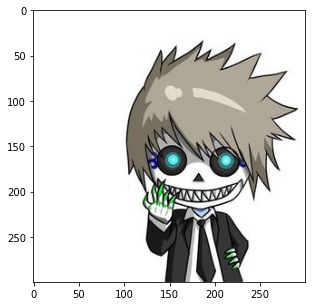

In [53]:
image = cv2.imread(path)
showImage(image)

**Повернутое изображение**

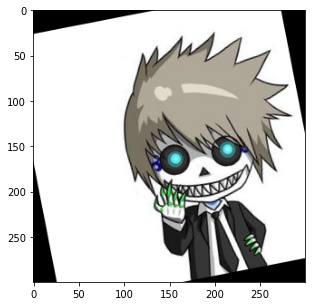

In [54]:
imageRotation = rotation(image, angle)
showImage(imageRotation)

**Прямоугольник максимальной площади из повернутого изображения**

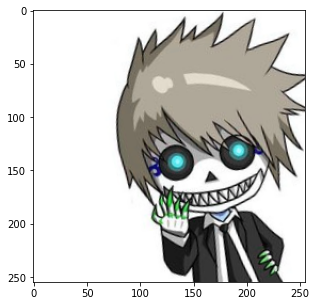

In [55]:
(h, w) = image.shape[:2]
imageCrop = crop_around_center(imageRotation, *largest_rotated_rect(w, h, math.radians(angle)))
showImage(imageCrop)

**Изображение увеличивается по оси Y в 1/k раз и уменьшается по оси Х в k раз**

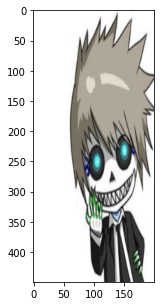

In [56]:
result = resizing(imageCrop, int(w * k), int(h * (1 / k)), interpolation = inter[n])
showImage(result)